In [2]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## Preparing Data

In [12]:
df = pd.read_csv("myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [14]:
df_2 = df.drop("MYOPIC", axis=1)
df_2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


## PCA and t-SNE

In [15]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_2)

In [16]:
pca = PCA(n_components = 0.9)

In [18]:
tsne = TSNE(learning_rate=35, perplexity = 50)
tsne_features = tsne.fit_transform(df_2)

C:\Users\cabon\miniconda3\envs\ai_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [39]:
df_tsne = pd.DataFrame({"1": tsne_features[:,0], "2": tsne_features[:,1]})
df_tsne.head()

,1,2
0,5.096587,-10.721871
1,-17.827513,6.611605
2,-7.689925,-2.438740
3,10.222318,-6.191575
4,-13.934891,-6.201199


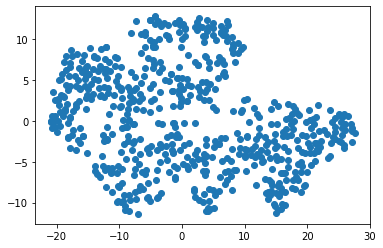

In [35]:
plt.scatter(df_tsne["1"], df_tsne["2"])
plt.show()

Visually I can say that there are two distinct clusers. Maybe even three

## Finding k using Elbow Curve

C:\Users\cabon\miniconda3\envs\ai_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


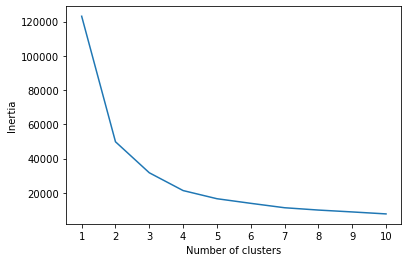

In [36]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

I believe the point of best fit will have to be at about 5 clusters.

### Conclusion
From my findings, it seems that the patients could be clustered into 5 clusters.